# <span style="color:darkblue"> Lecture 11: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [4]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)


list

<font size = "5">
Random assignment


In [5]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment


<font size = "5">

Compute frequencies by status

In [9]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,229
Treatment,169


col_0,Frequency
status,
Control,0.575377
Treatment,0.424623


<font size = "5">

Query with string conditions

In [6]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [46]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,23.656552,5.558621,194.965517,2999.124138,15.622069
std,8.487383,1.735559,103.989477,862.268865,2.806626
min,9.000000,4.000000,68.000000,1760.000000,9.500000
25%,17.000000,4.000000,98.000000,2200.000000,13.900000
50%,22.000000,4.000000,144.000000,2910.000000,15.000000
75%,29.900000,8.000000,302.000000,3672.000000,17.300000
max,46.600000,8.000000,455.000000,5140.000000,24.600000


,mpg,cylinders,displacement,weight,acceleration
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,23.433202,5.395257,192.545455,2953.976285,15.537154
std,7.420168,1.681451,104.624019,839.151120,2.734372
min,10.000000,3.000000,70.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,2245.000000,13.800000
50%,23.000000,4.000000,151.000000,2735.000000,15.500000
75%,28.800000,6.000000,258.000000,3563.000000,17.000000
max,44.600000,8.000000,455.000000,4997.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [28]:
test = pd.DataFrame()

test["Name"]=['Bob','Curtis','Nick','John']
test["Height"]=[175,177,195,168]
display(test)
def check(x):
    if(x<170):
        return x
    else:
        return x/2

check(50)
test['Modified Height']=test['Height'].apply(check)
display(test)




,Name,Height
0,Bob,175
1,Curtis,177
2,Nick,195
3,John,168


,Name,Height,Modified Height
0,Bob,175,87.5
1,Curtis,177,88.5
2,Nick,195,97.5
3,John,168,168.0


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [31]:
display(carfeatures)
mean_mpg = carfeatures['mpg'].mean()
median_displacement=carfeatures['displacement'].median()

organized_carfeatures=carfeatures.query('(mpg>@mean_mpg)&(displacement<@median_displacement)')
display(organized_carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
14,24.0,4,113,95,2372,15.0,T-1689934,Control
18,27.0,4,97,88,2130,14.5,D-1689978,Control
19,26.0,4,97,46,1835,20.5,V-1689989,Control
20,25.0,4,110,87,2672,17.5,P-1690000,Control
21,24.0,4,107,90,2430,14.5,A-1690011,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment


<font size = "5">

(c) Use sorting + ".iloc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [34]:
sorted_organized = organized_carfeatures.sort_values(by='acceleration',ascending = True)
display(sorted_organized)
display(sorted_organized.iloc[:5,:])


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
395,32.0,4,135,84,2295,11.6,D-1694125,Control
203,29.5,4,97,71,1825,12.2,V-1692013,Treatment
334,23.7,3,70,100,2420,12.5,M-1693454,Treatment
23,26.0,4,121,113,2234,12.5,B-1690033,Control
342,30.0,4,135,84,2385,12.9,P-1693542,Treatment
...,...,...,...,...,...,...,...,...
196,24.5,4,98,60,2164,22.1,C-1691936,Treatment
195,29.0,4,85,52,2035,22.2,C-1691925,Treatment
326,43.4,4,90,48,2335,23.7,V-1693366,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Control


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
395,32.0,4,135,84,2295,11.6,D-1694125,Control
203,29.5,4,97,71,1825,12.2,V-1692013,Treatment
334,23.7,3,70,100,2420,12.5,M-1693454,Treatment
23,26.0,4,121,113,2234,12.5,B-1690033,Control
342,30.0,4,135,84,2385,12.9,P-1693542,Treatment


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 11 (this one)
- You will need this result to answer questions (e), (f)


In [37]:
list_status  = ["Treatment","Control"]
prop_status  = [0.3,0.7]
size_dataset = len(carfeatures)

carfeatures["status"] = np.random.choice(list_status, #Treatment or Control
                                         size = size_dataset, #apply to every row
                                         p = prop_status) #proportion of ppl w treatment or control

display(carfeatures)

treated_group =carfeatures.query('status=="Treatment"')
control_group=carfeatures.query('status=="Control"')#need double and single quotations


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [ ]:
def f(y,x,b0,b1):
    carfeatures['mpg'].std()

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

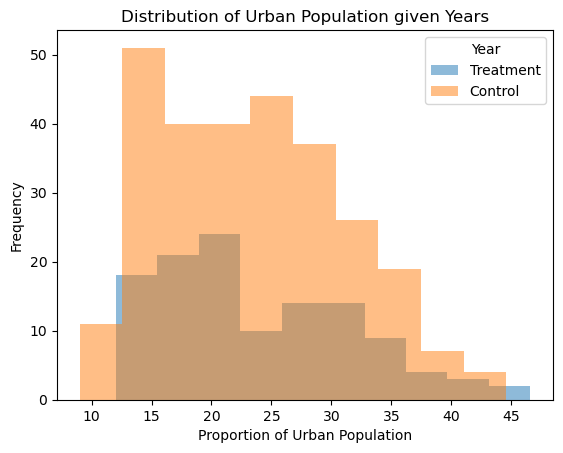

from the graph, we can see a larger proportion of people live in urban populations in 2020 compared to 1980


In [39]:
# Write your own code here
#urban=pd.read_csv("data/wdi_urban.csv")
#list_unique_year=pd.unique(urban["year"]) #based on year, could change to either treatment or control

for category in list_status:
    df = carfeatures.query("status==@category")
    plt.hist(x=df["mpg"],alpha=0.5)



plt.ylabel("Frequency")
plt.xlabel("Proportion of Urban Population")
plt.title("Distribution of Urban Population given Years")
plt.legend(labels = list_status,title="Year")
plt.show()

print('from the graph, we can see a larger proportion of people live in urban populations in 2020 compared to 1980')